# Hands-on Image Processing with Python
## Chapter 3: Convolution and Frequency domain Filtering

## Author: Sandipan Dey

### Import libraries

In [3]:
% matplotlib inline 
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

### Frequency domain Gaussian blur filter with numpy fft

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


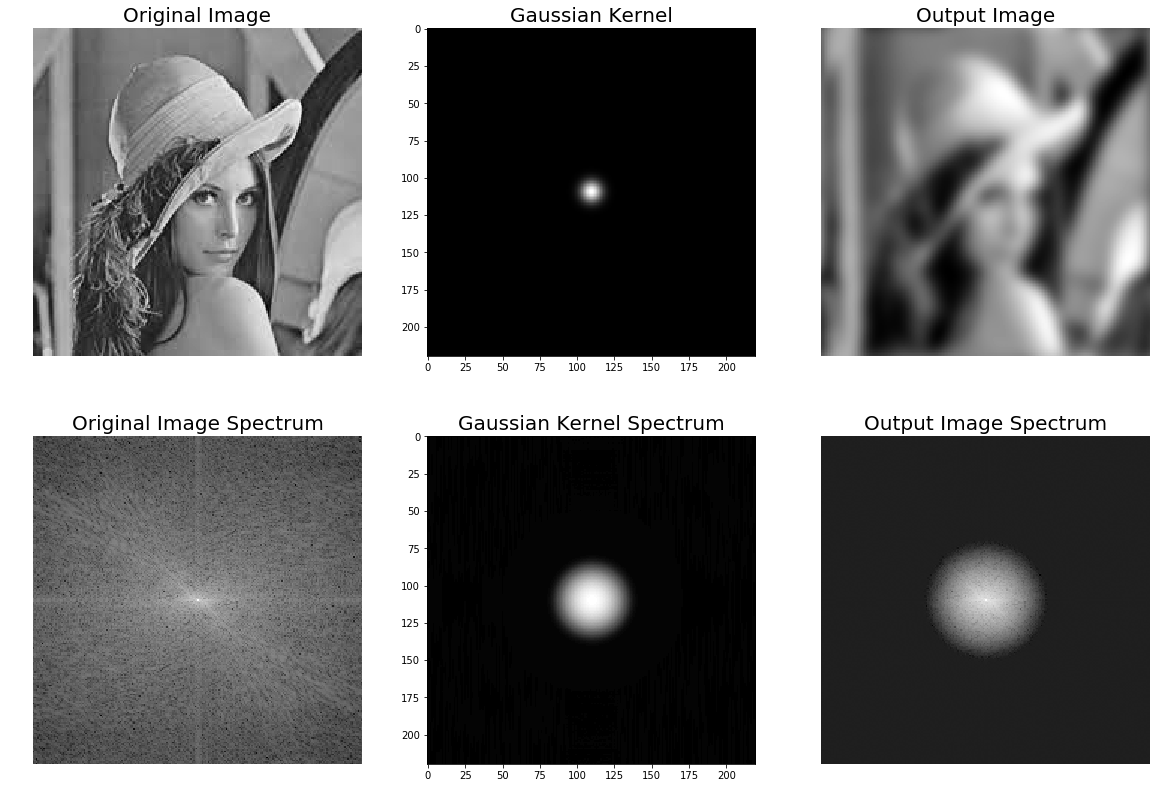

In [6]:
pylab.figure(figsize=(20,15))
pylab.gray() # show the filtered result in grayscale
im = np.mean(imread('../images/lena.jpg'), axis=2)
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))
freq = fp.fft2(im)
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq*freq_kernel # by the convolution theorem, simply multiply in the frequency domain
im1 = fp.ifft2(convolved).real
pylab.subplot(2,3,1), pylab.imshow(im), pylab.title('Original Image',
size=20), pylab.axis('off')
pylab.subplot(2,3,2), pylab.imshow(gauss_kernel), pylab.title('Gaussian Kernel', size=20)
pylab.subplot(2,3,3), pylab.imshow(im1) # the imaginary part is an artifact
pylab.title('Output Image', size=20), pylab.axis('off')
pylab.subplot(2,3,4), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
pylab.title('Original Image Spectrum', size=20), pylab.axis('off')
pylab.subplot(2,3,5), pylab.imshow( (20*np.log10( 0.1 +
fp.fftshift(freq_kernel))).astype(int))
pylab.title('Gaussian Kernel Spectrum', size=20), pylab.subplot(2,3,6)
pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))
pylab.title('Output Image Spectrum', size=20), pylab.axis('off')
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

### Gaussian kernel in the frequency domain

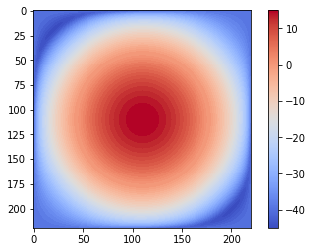

In [8]:
im = rgb2gray(imread('../images/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1),
signal.gaussian(im.shape[1], 1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
pylab.imshow( (20*np.log10( 0.01 +
fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm') # 0.01 is added to keep the argument to log function always positive
pylab.colorbar()
pylab.show()

### Frequency domain Gaussian blur filter with scipy signal fftconvolve()

(224, 225)


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


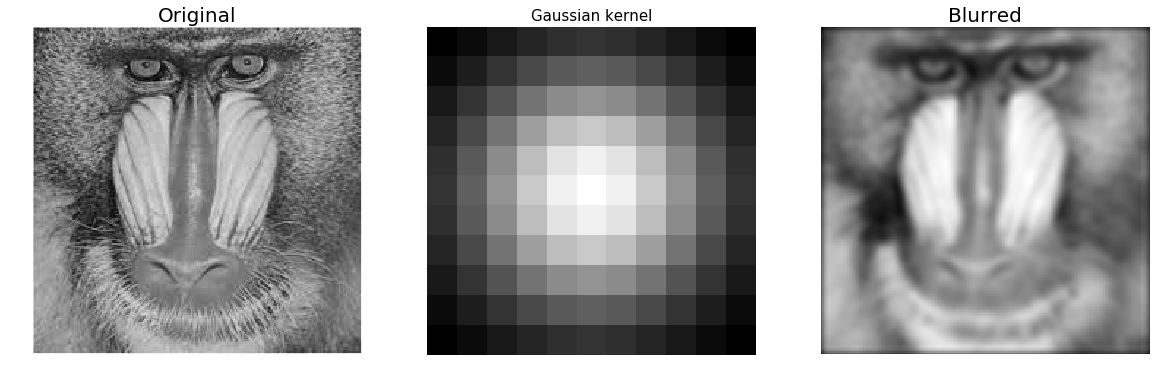

In [9]:
im = np.mean(misc.imread('../images/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')
fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


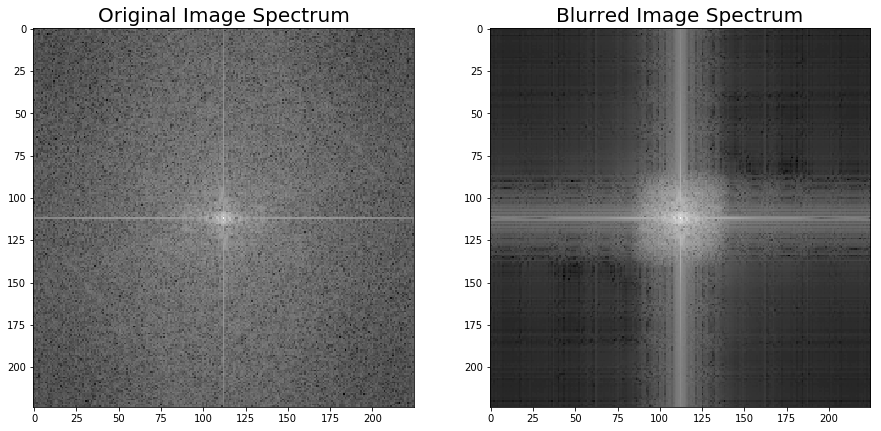

In [12]:
import scipy.fftpack as fftpack
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.figure(figsize=(15,8))
pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Original Image Spectrum', size=20)
F1 = fftpack.fft2((im_blurred).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Blurred Image Spectrum', size=20)
pylab.show()

### Comparing the runtimes of SciPy convolve() and fftconvolve() with the Gaussian blur kernel

(224, 225)


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


(<matplotlib.axes._subplots.AxesSubplot at 0x19cab4bfb70>,
 (-0.5, 224.5, 223.5, -0.5))

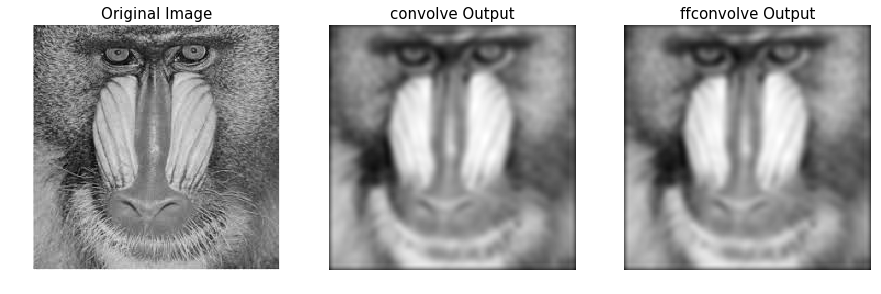

In [13]:
im = np.mean(misc.imread('../images/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve
wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)
pylab.figure(figsize=(15,5))
pylab.gray()
pylab.subplot(131), pylab.imshow(im), pylab.title('Original Image',size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_blurred1), pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_blurred2), pylab.title('ffconvolve Output', size=15),pylab.axis('off')

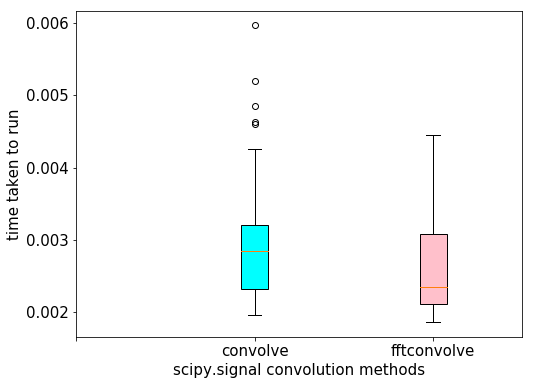

In [14]:
data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True) #notch=True,
colors = ['cyan', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size = 15)
pylab.show()

### High-Pass Filter (HPF)

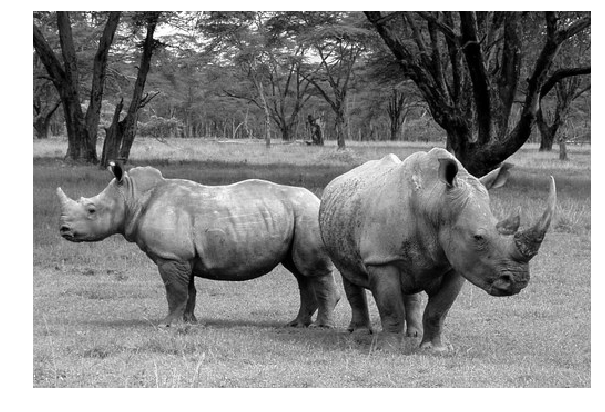

(<matplotlib.figure.Figure at 0x19ca9181a58>,
 (-0.5, 502.5, 339.5, -0.5),
 None)

In [16]:
im = np.array(Image.open('../images/rhino.jpg').convert('L'))
pylab.figure(figsize=(10,10)), pylab.imshow(im, cmap=pylab.cm.gray), pylab.axis('off'), pylab.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


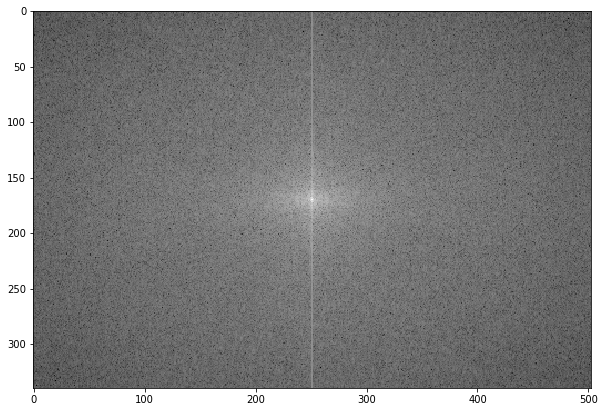

(<matplotlib.figure.Figure at 0x19ca91bf320>,
 None)

In [18]:
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


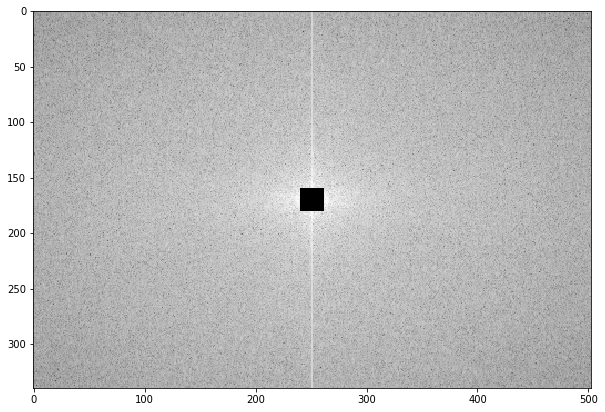

In [20]:
# apply HPF
freq2[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # select all but the first 20x20 (low) frequencies
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

0.5901647786775175


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `signaltonoise` is deprecated!
scipy.stats.signaltonoise is deprecated in scipy 0.16.0
  


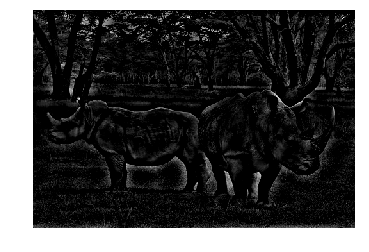

(<matplotlib.image.AxesImage at 0x19caac8a0b8>,
 (-0.5, 502.5, 339.5, -0.5),
 None)

In [21]:
im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
print(signaltonoise(im1, axis=None))
# 0.5901647786775175
pylab.imshow(im1, cmap='gray'), pylab.axis('off'), pylab.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `signaltonoise` is deprecated!
scipy.stats.signaltonoise is deprecated in scipy 0.16.0
  


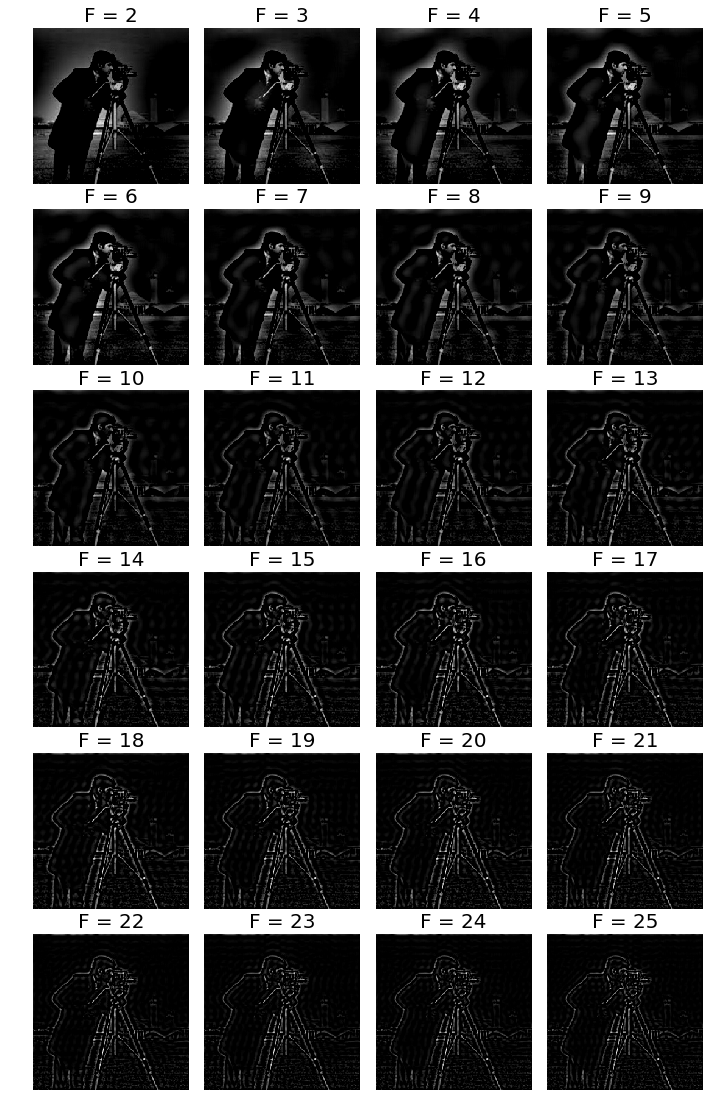

In [26]:
from scipy import fftpack
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_hp = []
lbs = list(range(1,25))
pylab.figure(figsize=(12,20))
for l in lbs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2[half_w-l:half_w+l+1,half_h-l:half_h+l+1] = 0 # select all but the first lxl (low) frequencies
    im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
    snrs_hp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,l), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(l+1), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

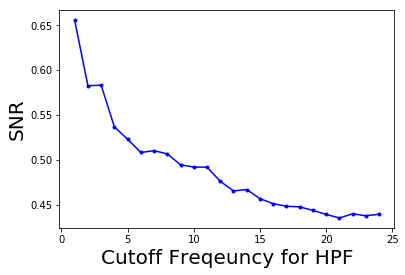

In [27]:
pylab.plot(lbs, snrs_hp, 'b.-')
pylab.xlabel('Cutoff Freqeuncy for HPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

### Low-pass filter (LPF)

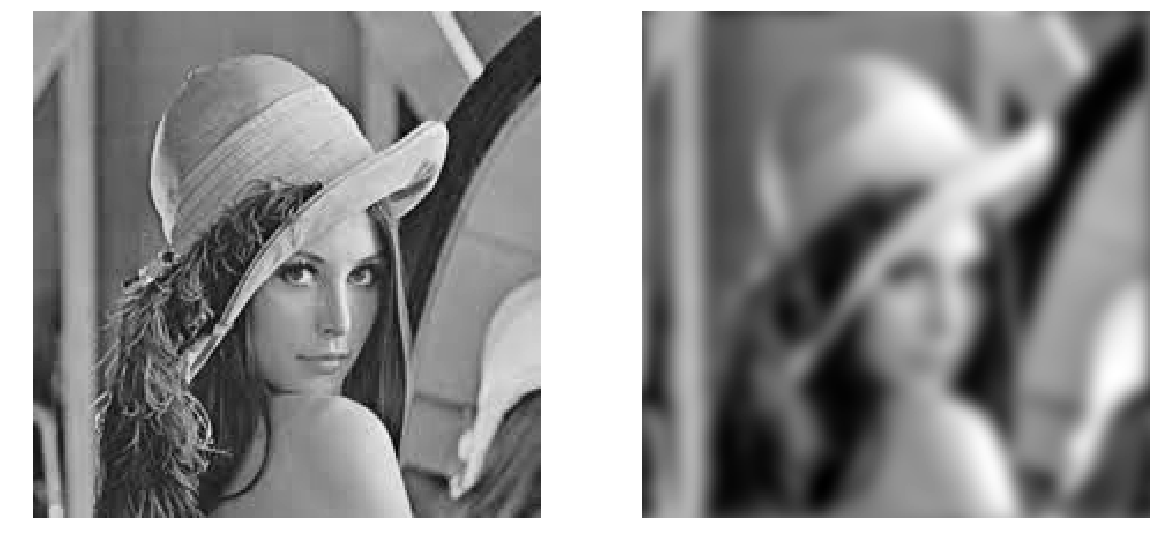

In [29]:
import numpy.fft as fp
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray() # show the result in grayscale
im = np.mean(imread('../images/lena.jpg'), axis=2)
freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)
axes1.imshow(im), axes1.axis('off'), axes2.imshow(im1.real) # the imaginary part is an artifact
axes2.axis('off')
pylab.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


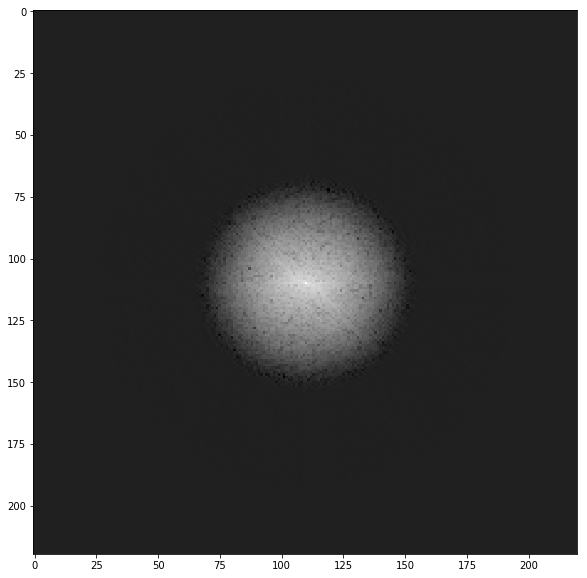

In [30]:
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 +
numpy.fft.fftshift(freq_gaussian))).astype(int))
pylab.show()

2.3891518564954275


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `signaltonoise` is deprecated!
scipy.stats.signaltonoise is deprecated in scipy 0.16.0
  del sys.path[0]


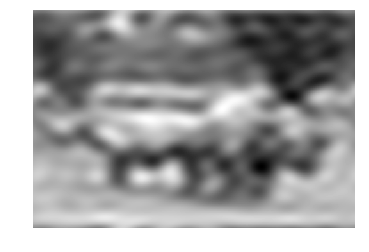

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


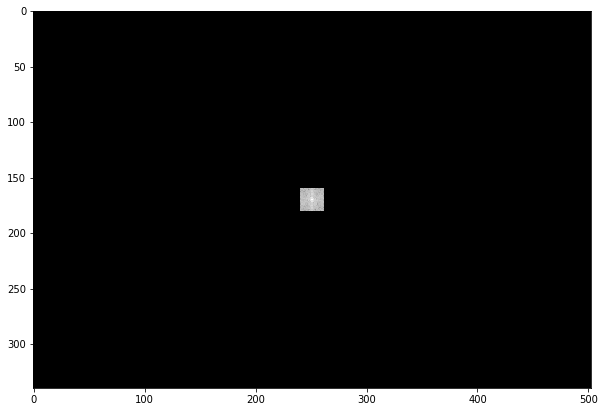

In [34]:
from scipy import fftpack
im = np.array(Image.open('../images/rhino.jpg').convert('L'))
# low pass filter
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fftpack.fftshift(freq1)
freq2_low = np.copy(freq2)
freq2_low[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # block the lowfrequencies
freq2 -= freq2_low # select only the first 20x20 (low) frequencies, block the high frequencies
im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
print(signaltonoise(im1, axis=None))
# 2.389151856495427
pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.show()
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `signaltonoise` is deprecated!
scipy.stats.signaltonoise is deprecated in scipy 0.16.0
  from ipykernel import kernelapp as app


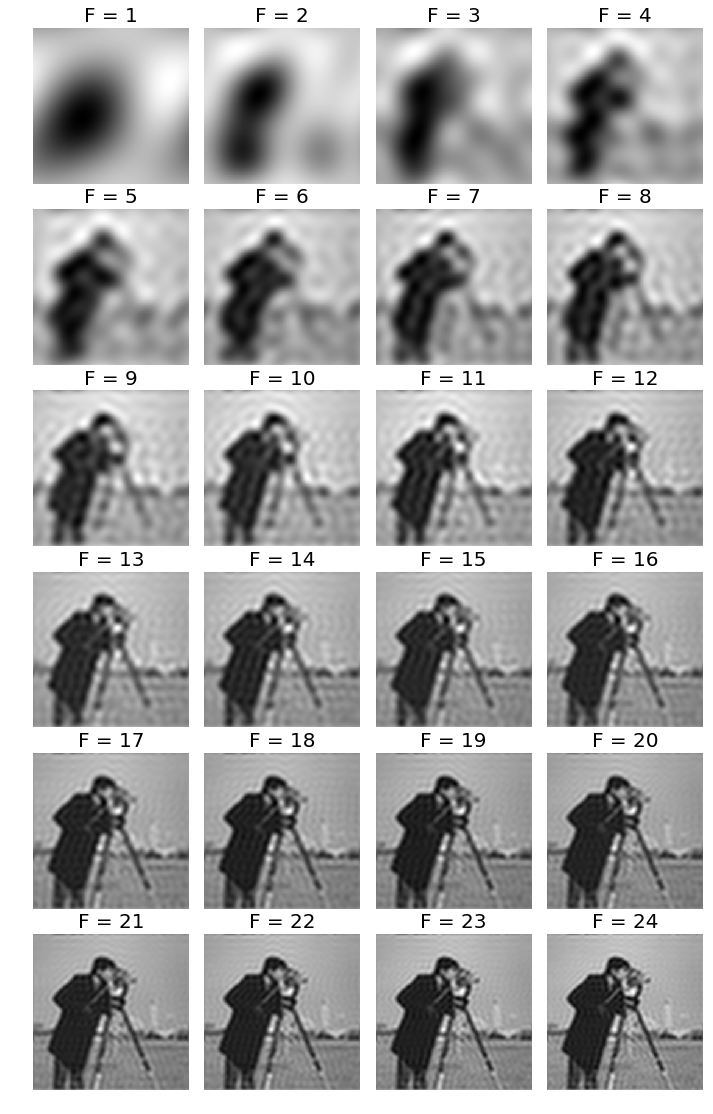

In [40]:
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))
pylab.figure(figsize=(12,20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
    freq2 -= freq2_low # select only the first 20x20 (low) frequencies
    im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
    snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `signaltonoise` is deprecated!
scipy.stats.signaltonoise is deprecated in scipy 0.16.0
  """Entry point for launching an IPython kernel.


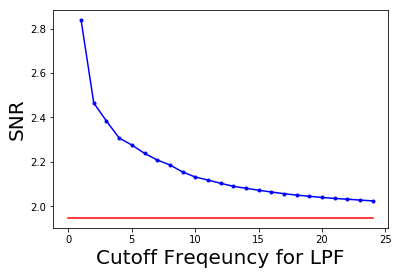

In [43]:
snr = signaltonoise(im, axis=None)
pylab.plot(ubs, snrs_lp, 'b.-')
pylab.plot(range(25), [snr]*25, 'r-')
pylab.xlabel('Cutoff Freqeuncy for LPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

### Band-pass filter (BPF) with DoG

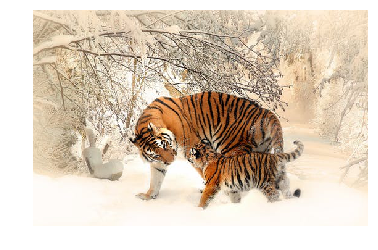

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


0.7862192363545746


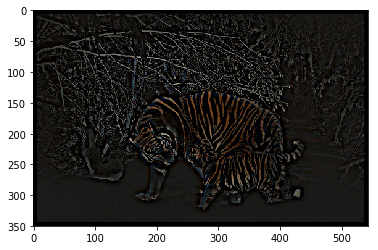

In [45]:
from skimage import img_as_float
im = img_as_float(pylab.imread('../images/tigers.jpeg'))
pylab.figure(), pylab.imshow(im), pylab.axis('off'), pylab.show()
x = np.linspace(-10, 10, 15)
kernel_1d = np.exp(-0.005*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
kernel_1d = np.exp(-5*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel2 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :, np.newaxis]
im = signal.fftconvolve(im, DoGKernel, mode='same')
pylab.figure(), pylab.imshow(np.clip(im, 0, 1)), print(np.max(im)),
pylab.show()

### Band-stop (notch) filter 

(340, 453)


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


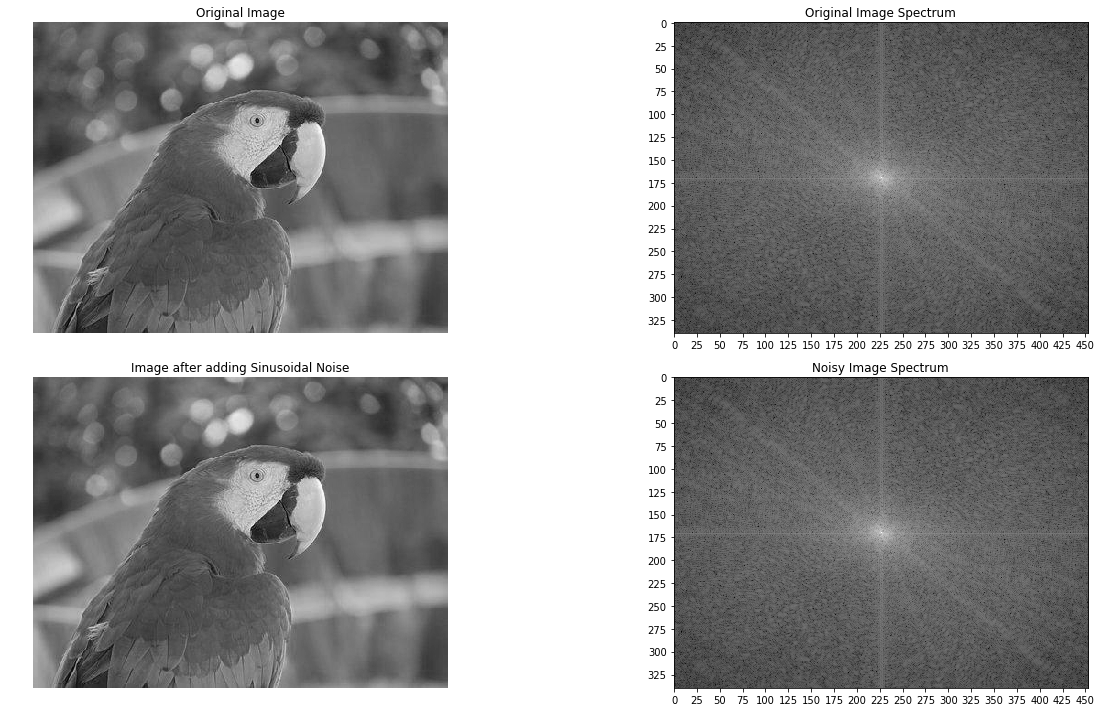

In [52]:
from scipy import fftpack
pylab.figure(figsize=(20,10))
im = img_as_float(np.mean(imread("../images/parrot.png"), axis=2))
print(im.shape)
pylab.subplot(2,2,1), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Original Image')
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.subplot(2,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Original Image Spectrum')
# add periodic noise to the image
for n in range(im.shape[1]):
    im[:, n] += np.cos(0.1*np.pi*n)
pylab.subplot(2,2,3), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Image after adding Sinusoidal Noise')
F1 = fftpack.fft2((im).astype(float)) # noisy spectrum
F2 = fftpack.fftshift( F1 )
pylab.subplot(2,2,4), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Noisy Image Spectrum')
pylab.tight_layout()
pylab.show()